In [2]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

In [26]:
sdf = src.read_csv('../Data/results/toy_star_2D.csv')
sdf.insert(0, "mass", 0.02, True)
sdf

,mass,x,y,vx,vy,u,h,rho
0,0.02,-0.117493,-0.327111,0.002785,-0.000845,0,0.129411,1.719703
1,0.02,-0.133594,0.396639,-0.005807,0.003163,0,0.139169,1.486988
2,0.02,0.270317,-0.111406,0.001252,-0.000317,0,0.124428,1.860173
3,0.02,0.420539,0.133630,0.005696,-0.004845,0,0.142781,1.412696
4,0.02,0.124701,-0.036215,0.005538,0.004089,0,0.115777,2.148559
...,...,...,...,...,...,...,...,...
95,0.02,0.356087,0.288132,0.004387,-0.001290,0,0.145804,1.354732
96,0.02,-0.123166,0.156314,0.008023,0.007770,0,0.118653,2.045652
97,0.02,0.063360,0.039909,-0.001115,-0.000849,0,0.114242,2.206674
98,0.02,-0.013033,-0.281251,0.001155,-0.000304,0,0.123641,1.883944


In [27]:
sdf.render('rho', xsec=1.0)

KeyError: "'mass' column does not exist in this SarracenDataFrame."

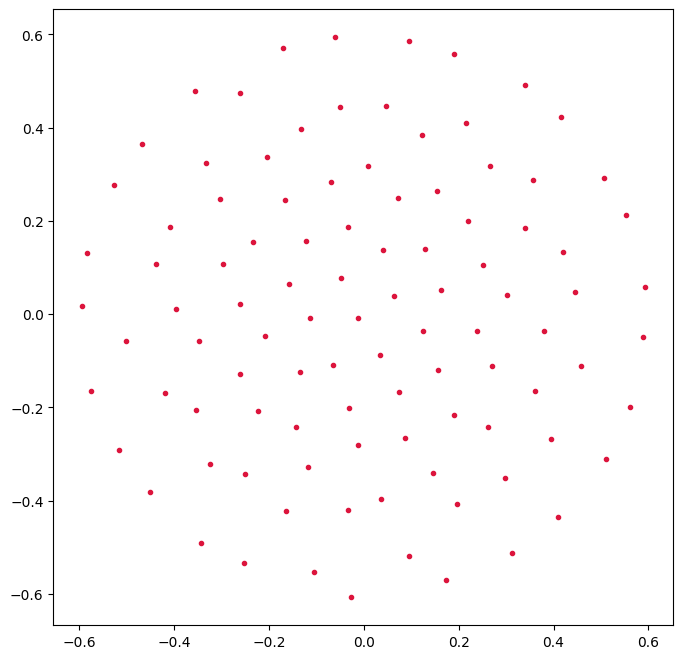

In [21]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
plt.show()

In [22]:
def density_theo(r, R, lmbda, k):
    return lmbda/(4*k)*(R**2-r**2)

In [23]:
R = 0.75
k = 0.1
M = 2.0
n = 1.0
lmbda = 2*k / (np.pi**(1/n)) * (M*(1+n)/R**2)**(1+1/n)/M

In [24]:
r = np.linspace(0.001, 1.1*R, 100)
dens = density_theo(r, R, lmbda, k)

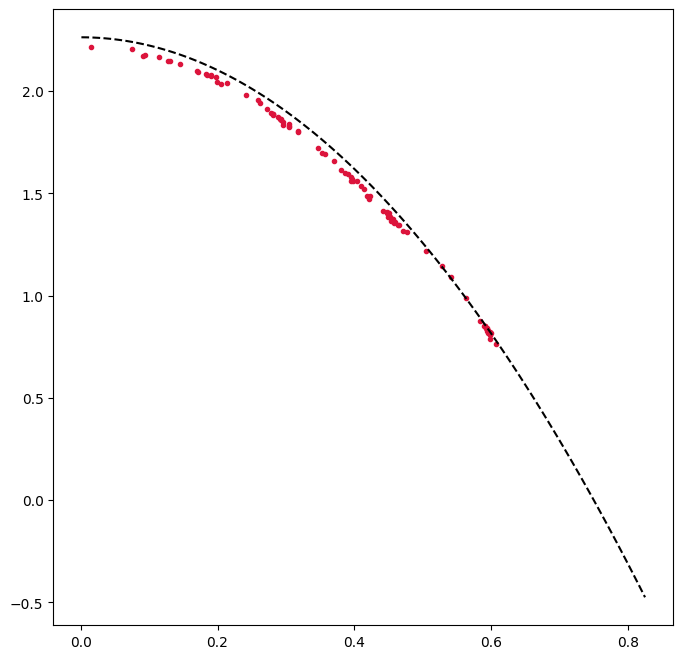

In [25]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.sqrt(sdf['x']**2+sdf['y']**2), sdf['rho'], '.', color='crimson')
plt.plot(r, dens, '--', color='k')
plt.show()